# Classification d'image avec TensorFlow

Commencer par installer le package Tensorflow. Pour cela suivre la procédure:

1. Ouvrir Anaconda Prompt
2. Ecrire la commande pip install tensorflow
3. Si vous rencontrez des erreurs, n'hésitez pas à les lire : parfois vous devez manuellement installer les packages indiqués comme manquants (notamment opencv-python)
4. Vous pouvez aussi faire un conda update --all

In [10]:
# Import des librairies
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Import des données

Nous allons effectuer notre reconnaissance d'image sur le Dataset FashionMist dont la documentation est disponible ici : https://github.com/zalandoresearch/fashion-mnist

Question 1 : Pouvez-vous me décrire ce dataset (qu'est-ce qu'il contient, combien y a-t-il d'images au total, quelles sont les différentes catégories, ...)

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Question 2 : Afficher le format des images contenu dans le dataset 'train_images'  
Combien y-a-t-il d'images dans ce dataset?

(60000, 28, 28)

In [5]:
len(train_labels) 

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Question 3 : Afficher le format des images contenu dans le dataset 'test_images'  
Combien y-a-t-il d'images dans ce dataset?

(10000, 28, 28)

In [8]:
len(test_labels)


10000

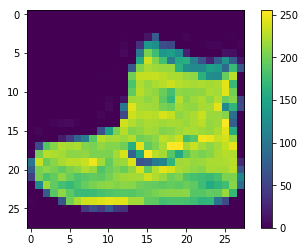

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

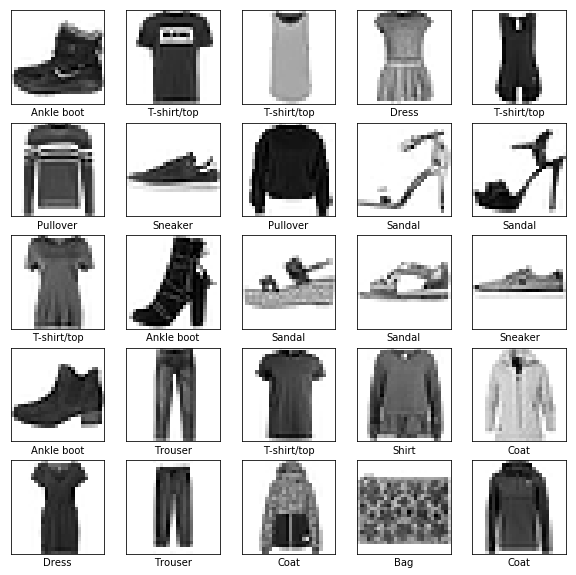

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Constuction du modèle

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Question 4 : Le paramètre epochs permet de spécifier le nombre de fois où on 'fait tourner' le training_set.   
Quel est selon vous le nombre optimal?

In [13]:
model.fit(train_images, train_labels, epochs=A_SPECIFIER)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 2.7723 - accuracy: 0.6937
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6970 - accuracy: 0.7401
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6114 - accuracy: 0.7638
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5549 - accuracy: 0.8005
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5377 - accuracy: 0.8125
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5083 - accuracy: 0.8249
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4963 - accuracy: 0.8286
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4933 - accuracy: 0.8323
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4874 - accuracy: 0.8347
Epoch 10/10
60

Question 5 : Analyser les résultats obtenus. Quelle précision atteint le modèle sur le training_set ?

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

In [17]:
predictions[0]

array([7.9647024e-19, 3.2465943e-15, 0.0000000e+00, 5.0523207e-16,
       1.5282110e-36, 1.8042576e-03, 0.0000000e+00, 2.7188130e-02,
       2.3625863e-14, 9.7100765e-01], dtype=float32)

In [18]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

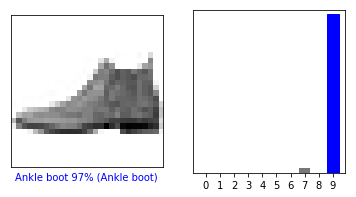

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

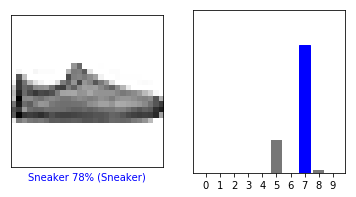

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

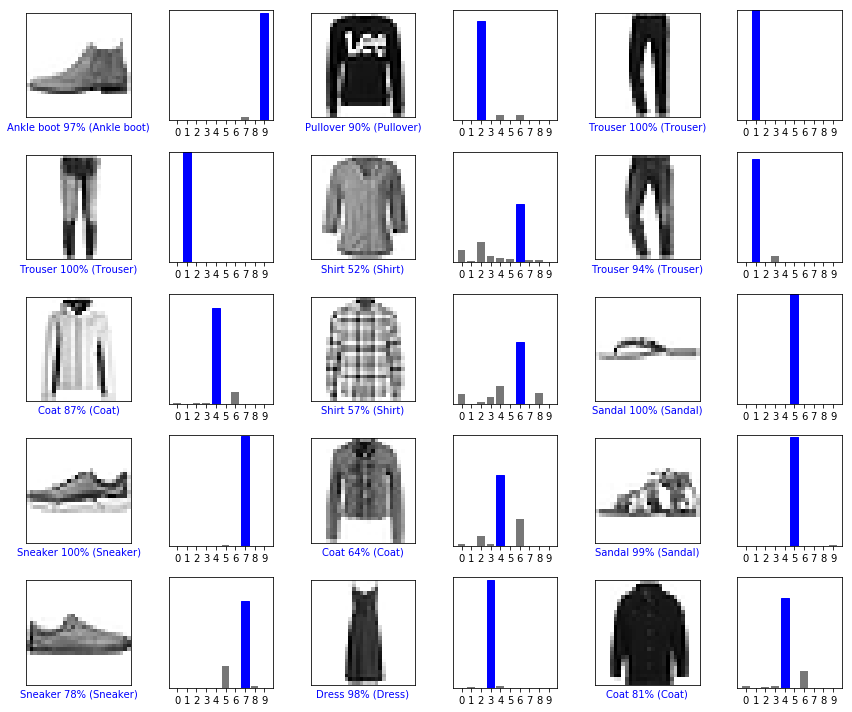

In [22]:
# Visualisation des num_rox x num_colos images
# La visualisation à côté des images donne la prédiction de catégorie (bleu si ok, vert si faux)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Question 5 : globalement sur quelle catégorie de vêtement l'algorithme semble le plus effice ? Le moins efficace ?

## Prediction sur une image

In [23]:
# Sélection d'une image.
img = test_images[1]

print(img.shape)

(28, 28)


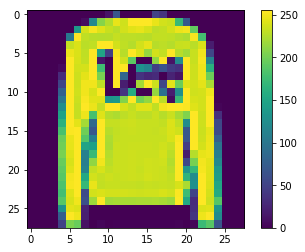

In [27]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7896857e-03 7.8235724e-05 9.0333652e-01 2.4219546e-03 4.5260176e-02
  1.0237023e-26 4.5113228e-02 0.0000000e+00 1.6738959e-07 1.4412622e-28]]


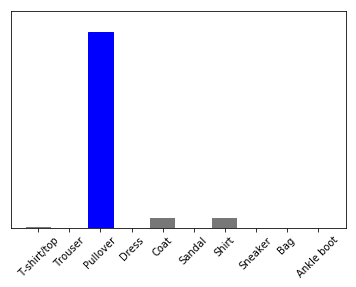

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

2

Question 6 : Dans quelle catégorie cette image sélectionnée a-t-elle été prédite ?

Question 7 : Reprenez maintenant l'ensemble du code de la partie 'Prediction d'une image' pour le tester sur la 5 ème image (le Shirt). Quelle est la prédiction de catégorie de vêtement ? A quelle précision?